# Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]
print(C1.shape)
print(C2.shape)

(30,)
(43,)


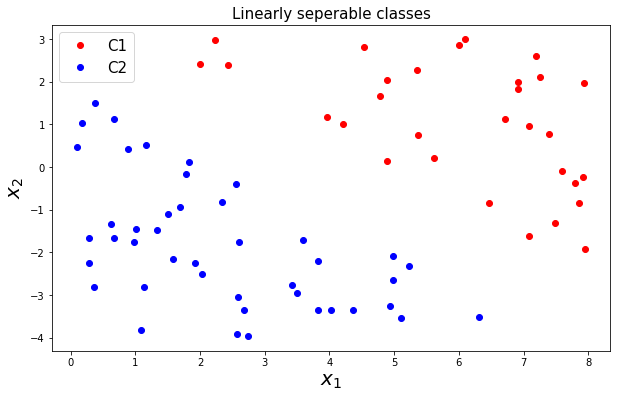

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

# Solution

In [3]:
print(len(C1))
print(len(C2))

30
43


In [9]:
X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])

X_ = np.vstack([X1, X2])
X = np.hstack([X_, np.ones([len(C1)+len(C2), 1])])

In [10]:
print(X1.shape)
print(X2.shape)
print(X_.shape)
print(X.shape)

(30, 2)
(43, 2)
(73, 2)
(73, 3)


In [15]:
y1 = np.ones([len(C1), 1])
y2 = -np.ones([len(C2), 1])

Y = np.vstack([y1, y2])
print(Y.shape)

(73, 1)


In [17]:
X = np.matrix(X)
Y = np.matrix(Y)

In [25]:
W = np.ones([3,1])
W = np.matrix(W)
h = np.sign(X*W)

In [32]:
np.where(h!=Y)[0]

array([31, 32, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 68, 69, 70,
       71, 72], dtype=int64)

In [34]:
print(X.T.shape)
print(Y.shape)

(3, 73)
(73, 1)


In [35]:
for i in range(100):
    h = np.sign(X*W)
    idx = np.where(h!=Y)[0]
    
    W = W + X[idx].T*Y[idx]
    
    print(len(idx))
    
    if len(idx) == 0:
        break

36
32
26
12
9
9
8
6
6
6
5
4
2
2
2
2
1
1
1
1
0


In [44]:
W[0,0]

25.886777958909235

In [45]:
xp = np.linspace(-1, 10, 100)
yp = -W[0,0]/W[1,0]*xp -W[2,0]/W[1,0]

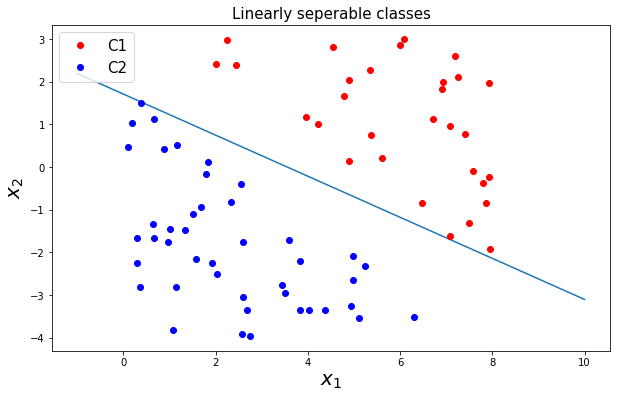

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(xp,yp)
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()